# Libraries

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import datetime
import plotly.express as px
import pyspark.sql.functions as f
import plotly.graph_objects as go
from matplotlib.ticker import FuncFormatter
from pyspark.sql.types import MapType
from pyspark.sql.functions import count,when,col,isnan,from_json,explode,map_keys,udf,coalesce,lit,to_date,year,split,get_json_object,array,collect_list,concat_ws,regexp_replace,regexp_extract
from pyspark.sql.types import StructType, StructField, IntegerType, StringType, ArrayType
from pyspark.sql.functions import udf, col, regexp_extract, from_json,col, when
from pyspark.sql.functions import  map_keys, explode, col, when, StringType, ArrayType, StructType, udf
from pyspark.sql import functions as F
from pyspark.sql import types
from pyspark.sql.types import StructField
from pyspark.ml.feature import Imputer, StringIndexer, OneHotEncoder, VectorAssembler, StandardScaler, Bucketizer, PCA, QuantileDiscretizer
from pyspark.ml import Pipeline
from pyspark.sql.functions import sum
from pyspark.sql.functions import col
from pyspark.sql.functions import from_unixtime


#1- Importing Datasets

In [0]:
ratings=spark.read\
.format("com.databricks.spark.csv")\
.option("multiline",True)\
.option("header",True)\
.option("escape", "\"")\
.option("inferschema",True)\
.csv("/FileStore/tables/ratings.csv")
display(ratings)


userId movieId rating timestamp 1 110 1.0 1425941529 1 147 4.5 1425942435 1 858 5.0 1425941523 1 1221 5.0 1425941546 1 1246 5.0 1425941556 1 1968 4.0 1425942148 1 2762 4.5 1425941300 1 2918 5.0 1425941593 1 2959 4.0 1425941601 1 4226 4.0 1425942228 1 4878 5.0 1425941434 1 5577 5.0 1425941397 1 33794 4.0 1425942005 1 54503 3.5 1425941313 1 58559 4.0 1425942007 1 59315 5.0 1425941502 1 68358 5.0 1425941464 1 69844 5.0 1425942139 1 73017 5.0 1425942699 1 81834 5.0 1425942133 1 91500 2.5 1425942647 1 91542 5.0 1425942618 1 92439 5.0 1425941424 1 96821 5.0 1425941382 1 98809 0.5 1425942640 1 99114 4.0 1425941667 1 112552 5.0 1425941336 2 5 3.0 867039249 2 25 3.0 867039168 2 32 2.0 867039166 2 58 3.0 867039325 2 64 4.0 867039612 2 79 4.0 867039325 2 141 3.0 867039168 2 260 4.0 867039249 2 339 5.0 867041296 2 377 4.0 867041121 2 605 4.0 867039973 2 628 4.0 867039325 2 648 4.0 867039167 2 762 3.0 867039325 2 780 3.0 867039165 2 786 1.0 867039249 2 788 1.0 867039288 2 1210 4.0 867039325 2 1233 4.0 867039820 2 1356 5.0 867039288 2 1475 3.0 867040824 2 1552 2.0 867040735 3 480 3.0 1048076925 3 500 2.0 1048076945 3 527 4.0 1048076900 3 858 4.0 1048076945 3 1092 3.0 1048076995 3 1097 3.0 1048076961 3 1270 3.0 1048076976 3 1968 3.0 1048077048 3 3101 3.0 1048076830 3 4474 3.0 1048077030 4 223 4.0 1042668576 4 415 4.0 1042667925 4 648 4.0 1042674800 4 1097 5.0 1042667925 4 1197 4.0 1042667956 4 1210 2.0 1042667865 4 1221 5.0 1042667903 4 1422 4.0 1042674861 4 1431 3.0 1042667945 4 1597 3.0 1042674787 4 1617 4.0 1042674412 4 1644 3.0 1042674845 4 1645 4.0 1042674787 4 1732 3.0 1042674761 4 1909 4.0 1042674761 4 1911 4.0 1042668589 4 2023 5.0 1042667945 4 2338 2.0 1042674886 4 2355 4.0 1042668559 4 2396 5.0 1042672546 4 2443 4.0 1042672491 4 2541 3.0 1042668576 4 2581 3.0 1042672363 4 2683 3.0 1042668505 4 2692 4.0 1042672531 4 2694 1.0 1042668544 4 2706 4.0 1042668505 4 2710 2.0 1042668544 4 2712 3.0 1042668621 4 2716 4.0 1042672283 4 2762 5.0 1042672546 4 2763 4.0 1042672556 4 2805 3.0 1042672352 4 2875 4.0 1042674773 4 2881 3.0 1042668589 4 2987 4.0 1042672592 4 3004 1.0 1042668521 4 3005 3.0 1042668544 4 3114 5.0 1042672580 4 3160 4.0 1042672335 4 3203 4.0 1042668576 4 3285 3.0 1042668521 4 3298 3.0 1042668544 4 3408 5.0 1042668604 4 3409 2.0 1042668621 4 3476 4.0 1042674436 4 3578 4.0 1042672283 4 3623 2.0 1042672352 4 3751 4.0 1042668559 4 3752 3.0 1042672335 4 3753 4.0 1042672491 4 3798 4.0 1042672580 4 3908 2.0 1042672580 4 3909 3.0 1042672592 4 3977 3.0 1042668559 4 4014 4.0 1042667845 4 4084 3.0 1042667925 4 4226 3.0 1042674412 4 4238 4.0 1042674819 4 4848 3.0 1042674425 4 4896 4.0 1042667845 4 5679 3.0 1042674579 5 7 3.0 949423844 5 157 2.0 949423787 5 296 4.0 949424343 5 541 5.0 949424321 5 750 5.0 949424271 5 858 5.0 949424168 5 908 5.0 949424374 5 1193 5.0 949424374 5 1198 4.0 949424343 5 1201 5.0 949424321 5 1204 5.0 949424271 5 1225 4.0 949424343 5 1230 5.0 949423787 5 1254 5.0 949424374 5 1263 5.0 949424271 5 1270 5.0 949423844 5 1302 5.0 949423787 5 1945 5.0 949424321 5 2163 2.0 949424522 5 2707 5.0 949424045 5 2877 1.0 949424482 5 3079 5.0 949423938 5 3114 4.0 949423938 5 3156 5.0 949423978 5 3198 4.0 949424188 5 3255 3.0 949423844 6 11 3.0 944894480 6 1198 3.0 944894480 6 2565 4.0 944894144 6 2628 5.0 944928077 7 293 5.0 1486253647 7 318 4.0 1486253595 7 2571 4.0 1486253599 7 2858 4.5 1486254186 7 2959 4.5 1486253602 7 3535 5.0 1486253781 7 3948 1.5 1486253699 7 4022 4.0 1486253683 7 4306 2.5 1486253672 7 4896 4.5 1486253687 7 4993 5.0 1486253608 7 5618 4.0 1486253703 7 5810 2.0 1486253944 7 5816 4.5 1486253705 7 6377 3.5 1486253615 7 6934 2.0 1486253729 7 7153 4.5 1486253605 7 8368 4.0 1486253719 7 8533 4.0 1486253918 7 8961 2.5 1486253617 7 30793 2.5 1486253796 7 33794 4.0 1486253619 7 35836 3.0 1486253758 7 39183 3.0 1486253891 7 40815 2.5 1486253738 7 41566 2.0 1486253798 7 50872 4.0 1486253740 7 51255 2.5 1486253771 7 54001 3.0 1486253787 7 54272 4.0 1486253880 7 54503 3.5 1486253805 7 55247 2.0 1486253865 7 58559 5.0 1

In [0]:
links=spark.read\
.format("com.databricks.spark.csv")\
.option("multiline",True)\
.option("header",True)\
.option("escape", "\"")\
.option("inferschema",True)\
.csv("/FileStore/tables/links.csv")
display(links)


movieId imdbId tmdbId 1 114709 862 2 113497 8844 3 113228 15602 4 114885 31357 5 113041 11862 6 113277 949 7 114319 11860 8 112302 45325 9 114576 9091 10 113189 710 11 112346 9087 12 112896 12110 13 112453 21032 14 113987 10858 15 112760 1408 16 112641 524 17 114388 4584 18 113101 5 19 112281 9273 20 113845 11517 21 113161 8012 22 112722 1710 23 112401 9691 24 114168 12665 25 113627 451 26 114057 16420 27 114011 9263 28 114117 17015 29 112682 902 30 115012 37557 31 112792 9909 32 114746 63 33 114952 78802 34 112431 9598 35 112637 47018 36 112818 687 37 112286 139405 38 113442 33689 39 112697 9603 40 112749 34615 41 114279 31174 42 112819 11443 43 114272 35196 44 113855 9312 45 114681 577 46 113347 11861 47 114369 807 48 114148 10530 49 114916 8391 50 114814 629 51 109950 117164 52 113819 11448 53 110299 49133 54 112499 26441 55 113158 97406 56 113541 124057 57 113321 9089 58 110877 11010 59 112714 99040 60 113419 11359 61 116260 17182 62 113862 2054 63 116126 10607 64 118002 19760 65 115683 9536 66 116839 11525 67 114753 40628 68 113149 4482 69 113118 10634 70 116367 755 71 113010 11859 72 113537 28387 73 113828 48750 74 115644 20927 75 115676 36929 76 114367 9102 77 113973 124626 78 112744 27526 79 116731 9623 80 112445 46785 81 114660 400 82 112379 880 83 114039 146599 84 113612 188588 85 112365 8447 86 118158 10534 87 116151 17414 88 115697 13997 89 113972 2086 90 113490 61548 92 117002 9095 93 114825 12158 94 115639 9283 95 115759 9208 96 113403 40154 97 113247 406 98 111173 45549 99 113283 63076 100 115907 11062 101 115734 13685 102 117102 47475 103 118040 2045 104 116483 9614 105 112579 688 106 110251 11907 107 117110 10874 108 112646 89333 109 113276 96357 110 112573 197 111 75314 103 112 113326 33542 113 115645 43566 114 113774 71754 115 112556 43612 116 112373 51352 117 115033 16934 118 116606 10324 119 114536 78406 120 117427 55731 121 106473 32119 122 103859 11066 123 109424 11104 124 114808 37975 125 116324 2074 126 110647 27793 127 111055 44284 128 110217 290157 129 114131 110972 130 112364 32622 131 113107 73067 132 113451 11863 133 114015 55475 134 114500 124636 135 116130 9101 136 113125 123360 137 113756 5757 138 113952 39428 139 114618 124639 140 118055 9302 141 115685 11000 142 94878 null 143 113200 249882 144 112585 16388 145 112442 9737 146 112342 30765 147 112461 10474 148 112427 22279 149 109093 30157 150 112384 568 151 114287 11780 152 112288 34996 153 112462 414 154 61395 649 155 112495 1873 156 112541 5894 157 109370 1775 158 112642 8839 159 112688 20649 160 112715 10329 161 112740 8963 162 109508 26564 163 112851 8068 164 112857 8512 165 112864 1572 166 112887 13552 167 113044 259209 168 113071 6520 169 113114 9073 170 113243 10428 171 113464 17447 172 113481 9886 173 113492 9482 174 113500 19326 175 113540 9344 176 113677 9071 177 113690 8973 178 107447 15730 179 113729 47608 180 113749 2293 181 113820 9070 182 113851 68274 183 110604 48787 184 110620 34574 185 113957 1642 186 113986 11472 187 114095 36196 188 114194 11980 189 114241 58372 190 114323 32646 191 114345 10533 192 114435 56088 193 114436 10802 194 114478 10149 195 114496 18402 196 114508 9348 197 114534 139408 198 114558 281 199 58450 5967 200 114666 79593 201 114663 47939 202 114702 36834 203 114682 9090 204 114781 3512 205 114798 52856 206 114805 77350 207 114887 9560 208 114898 9804 209 114928 31611 210 114938 65796 211 109340 49805 212 112602 26258 213 111579 50797 214 110882 19155 215 112471 76 216 112508 11017 217 112438 37141 218 112571 9382 219 112757 6715 220 112643 18256 222 112679 22625 223 109445 2292 224 112883 1909 225 109635 8984 226 112899 61813 227 109676 4954 228 112854 62488 229 109579 10531 230 109642 11929 231 109686 8467 232 111797 10451 233 109759 20156 234 109758 18395 235 109707 522 236 113117 397 237 113097 10525 238 113028 27985 239 113198 15789 240 113303 27303 241 113089 21183 242 109771 10954 243 113199 47867 244 113234 43475 245 109906 72031 246 110057 14275 247 110005 1024 248 110066 17207 249 110116 1370

In [0]:
credits=spark.read\
.format("com.databricks.spark.csv")\
.option("multiline",True)\
.option("header",True)\
.option("escape", "\"")\
.option("inferschema",True)\
.csv("/FileStore/tables/credits.csv")
display(credits)


cast crew id [{'cast_id': 14, 'character': 'Woody (voice)', 'credit_id': '52fe4284c3a36847f8024f95', 'gender': 2, 'id': 31, 'name': 'Tom Hanks', 'order': 0, 'profile_path': '/pQFoyx7rp09CJTAb932F2g8Nlho.jpg'}, {'cast_id': 15, 'character': 'Buzz Lightyear (voice)', 'credit_id': '52fe4284c3a36847f8024f99', 'gender': 2, 'id': 12898, 'name': 'Tim Allen', 'order': 1, 'profile_path': '/uX2xVf6pMmPepxnvFWyBtjexzgY.jpg'}, {'cast_id': 16, 'character': 'Mr. Potato Head (voice)', 'credit_id': '52fe4284c3a36847f8024f9d', 'gender': 2, 'id': 7167, 'name': 'Don Rickles', 'order': 2, 'profile_path': '/h5BcaDMPRVLHLDzbQavec4xfSdt.jpg'}, {'cast_id': 17, 'character': 'Slinky Dog (voice)', 'credit_id': '52fe4284c3a36847f8024fa1', 'gender': 2, 'id': 12899, 'name': 'Jim Varney', 'order': 3, 'profile_path': '/eIo2jVVXYgjDtaHoF19Ll9vtW7h.jpg'}, {'cast_id': 18, 'character': 'Rex (voice)', 'credit_id': '52fe4284c3a36847f8024fa5', 'gender': 2, 'id': 12900, 'name': 'Wallace Shawn', 'order': 4, 'profile_path': '/oGE6JqPP2xH4tNORKNqxbNPYi7u.jpg'}, {'cast_id': 19, 'character': 'Hamm (voice)', 'credit_id': '52fe4284c3a36847f8024fa9', 'gender': 2, 'id': 7907, 'name': 'John Ratzenberger', 'order': 5, 'profile_path': '/yGechiKWL6TJDfVE2KPSJYqdMsY.jpg'}, {'cast_id': 20, 'character': 'Bo Peep (voice)', 'credit_id': '52fe4284c3a36847f8024fad', 'gender': 1, 'id': 8873, 'name': 'Annie Potts', 'order': 6, 'profile_path': '/eryXT84RL41jHSJcMy4kS3u9y6w.jpg'}, {'cast_id': 26, 'character': 'Andy (voice)', 'credit_id': '52fe4284c3a36847f8024fc1', 'gender': 0, 'id': 1116442, 'name': 'John Morris', 'order': 7, 'profile_path': '/vYGyvK4LzeaUCoNSHtsuqJUY15M.jpg'}, {'cast_id': 22, 'character': 'Sid (voice)', 'credit_id': '52fe4284c3a36847f8024fb1', 'gender': 2, 'id': 12901, 'name': 'Erik von Detten', 'order': 8, 'profile_path': '/twnF1ZaJ1FUNUuo6xLXwcxjayBE.jpg'}, {'cast_id': 23, 'character': 'Mrs. Davis (voice)', 'credit_id': '52fe4284c3a36847f8024fb5', 'gender': 1, 'id': 12133, 'name': 'Laurie Metcalf', 'order': 9, 'profile_path': '/unMMIT60eoBM2sN2nyR7EZ2BvvD.jpg'}, {'cast_id': 24, 'character': 'Sergeant (voice)', 'credit_id': '52fe4284c3a36847f8024fb9', 'gender': 2, 'id': 8655, 'name': 'R. Lee Ermey', 'order': 10, 'profile_path': '/r8GBqFBjypLUP9VVqDqfZ7wYbSs.jpg'}, {'cast_id': 25, 'character': 'Hannah (voice)', 'credit_id': '52fe4284c3a36847f8024fbd', 'gender': 1, 'id': 12903, 'name': 'Sarah Freeman', 'order': 11, 'profile_path': None}, {'cast_id': 27, 'character': 'TV Announcer (voice)', 'credit_id': '52fe4284c3a36847f8024fc5', 'gender': 2, 'id': 37221, 'name': 'Penn Jillette', 'order': 12, 'profile_path': '/zmAaXUdx12NRsssgHbk1T31j2x9.jpg'}] [{'credit_id': '52fe4284c3a36847f8024f49', 'department': 'Directing', 'gender': 2, 'id': 7879, 'job': 'Director', 'name': 'John Lasseter', 'profile_path': '/7EdqiNbr4FRjIhKHyPPdFfEEEFG.jpg'}, {'credit_id': '52fe4284c3a36847f8024f4f', 'department': 'Writing', 'gender': 2, 'id': 12891, 'job': 'Screenplay', 'name': 'Joss Whedon', 'profile_path': '/dTiVsuaTVTeGmvkhcyJvKp2A5kr.jpg'}, {'credit_id': '52fe4284c3a36847f8024f55', 'department': 'Writing', 'gender': 2, 'id': 7, 'job': 'Screenplay', 'name': 'Andrew Stanton', 'profile_path': '/pvQWsu0qc8JFQhMVJkTHuexUAa1.jpg'}, {'credit_id': '52fe4284c3a36847f8024f5b', 'department': 'Writing', 'gender': 2, 'id': 12892, 'job': 'Screenplay', 'name': 'Joel Cohen', 'profile_path': '/dAubAiZcvKFbboWlj7oXOkZnTSu.jpg'}, {'credit_id': '52fe4284c3a36847f8024f61', 'department': 'Writing', 'gender': 0, 'id': 12893, 'job': 'Screenplay', 'name': 'Alec Sokolow', 'profile_path': '/v79vlRYi94BZUQnkkyznbGUZLjT.jpg'}, {'credit_id': '52fe4284c3a36847f8024f67', 'department': 'Production', 'gender': 1, 'id': 12894, 'job': 'Producer', 'name': 'Bonnie Arnold', 'profile_path': None}, {'credit_id': '52fe4284c3a36847f8024f6d', 'department': 'Production', 'gender': 0, 'id': 12895, 'job': 'Executive Producer', 'name': 'Ed Catmull', 'profile_path': None}, {'credit_id': '52fe4284c3a36847f8024f73', 'department': 'Production', 

In [0]:
movies_metadata=spark.read\
.format("com.databricks.spark.csv")\
.option("multiline",True)\
.option("header",True)\
.option("escape", "\"")\
.option("inferschema",True)\
.csv("/FileStore/tables/movies_metadata.csv")
display(movies_metadata)


adult belongs_to_collection budget genres homepage id imdb_id original_language original_title overview popularity poster_path production_companies production_countries release_date revenue runtime spoken_languages status tagline title video vote_average vote_count False {'id': 10194, 'name': 'Toy Story Collection', 'poster_path': '/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg', 'backdrop_path': '/9FBwqcd9IRruEDUrTdcaafOMKUq.jpg'} 30000000 [{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}] http://toystory.disney.com/toy-story 862 tt0114709 en Toy Story Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear onto the scene. Afraid of losing his place in Andy's heart, Woody plots against Buzz. But when circumstances separate Buzz and Woody from their owner, the duo eventually learns to put aside their differences. 21.946943 /rhIRbceoE9lR4veEXuwCC2wARtG.jpg [{'name': 'Pixar Animation Studios', 'id': 3}] [{'iso_3166_1': 'US', 'name': 'United States of America'}] 1995-10-30 373554033 81.0 [{'iso_639_1': 'en', 'name': 'English'}] Released null Toy Story false 7.7 5415 False null 65000000 [{'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy'}, {'id': 10751, 'name': 'Family'}] null 8844 tt0113497 en Jumanji When siblings Judy and Peter discover an enchanted board game that opens the door to a magical world, they unwittingly invite Alan -- an adult who's been trapped inside the game for 26 years -- into their living room. Alan's only hope for freedom is to finish the game, which proves risky as all three find themselves running from giant rhinoceroses, evil monkeys and other terrifying creatures. 17.015539 /vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg [{'name': 'TriStar Pictures', 'id': 559}, {'name': 'Teitler Film', 'id': 2550}, {'name': 'Interscope Communications', 'id': 10201}] [{'iso_3166_1': 'US', 'name': 'United States of America'}] 1995-12-15 262797249 104.0 [{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'fr', 'name': 'Français'}] Released Roll the dice and unleash the excitement! Jumanji false 6.9 2413 False {'id': 119050, 'name': 'Grumpy Old Men Collection', 'poster_path': '/nLvUdqgPgm3F85NMCii9gVFUcet.jpg', 'backdrop_path': '/hypTnLot2z8wpFS7qwsQHW1uV8u.jpg'} 0 [{'id': 10749, 'name': 'Romance'}, {'id': 35, 'name': 'Comedy'}] null 15602 tt0113228 en Grumpier Old Men A family wedding reignites the ancient feud between next-door neighbors and fishing buddies John and Max. Meanwhile, a sultry Italian divorcée opens a restaurant at the local bait shop, alarming the locals who worry she'll scare the fish away. But she's less interested in seafood than she is in cooking up a hot time with Max. 11.7129 /6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg [{'name': 'Warner Bros.', 'id': 6194}, {'name': 'Lancaster Gate', 'id': 19464}] [{'iso_3166_1': 'US', 'name': 'United States of America'}] 1995-12-22 0 101.0 [{'iso_639_1': 'en', 'name': 'English'}] Released Still Yelling. Still Fighting. Still Ready for Love. Grumpier Old Men false 6.5 92 False null 16000000 [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10749, 'name': 'Romance'}] null 31357 tt0114885 en Waiting to Exhale Cheated on, mistreated and stepped on, the women are holding their breath, waiting for the elusive "good man" to break a string of less-than-stellar lovers. Friends and confidants Vannah, Bernie, Glo and Robin talk it all out, determined to find a better way to breathe. 3.859495 /16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg [{'name': 'Twentieth Century Fox Film Corporation', 'id': 306}] [{'iso_3166_1': 'US', 'name': 'United States of America'}] 1995-12-22 81452156 127.0 [{'iso_639_1': 'en', 'name': 'English'}] Released Friends are the people who let you be yourself... and never let you forget it. Waiting to Exhale false 6.1 34 False {'id': 96871, 'name': 'Father of the Bride Collection', 'poster_path': '/nts4iOmNnq7GNicycMJ9pSAn204.jpg', 'backdrop_path': '/7qwE57OVZmMJChBpLEbJEmzUydk.jpg'} 0 [{'id': 35,

# 2- Data Cleaning

## 2.1 Missing Values

In [0]:
def count_missing_values(df):
    missing_values_count = {col: df.filter(df[col].isNull() | isnan(df[col])).count() for col in df.columns}
    return missing_values_count

In [0]:
print(count_missing_values(ratings))

{'userId': 0, 'movieId': 0, 'rating': 0, 'timestamp': 0}


In [0]:
print(count_missing_values(links))

{'movieId': 0, 'imdbId': 0, 'tmdbId': 219}


In [0]:
print(count_missing_values(credits))

{'cast': 0, 'crew': 0, 'id': 0}


In [0]:
credits=credits.na.drop(subset=["crew"])

In [0]:
datadict={'Movies_metadata.csv':movies_metadata}

for key,value in datadict.items() :
  dfStats= value.select([count(when(col(c).isNull()|isnan(c),'True')).alias(c) for c,c_type in value.dtypes if c_type not in ('timestamp','boolean')])
  print("Column stats for data file :" +key+"\n")
  dfStats.show()

Column stats for data file :Movies_metadata.csv

+-----+---------------------+------+------+--------+---+-------+-----------------+--------------+--------+----------+-----------+--------------------+--------------------+------------+-------+-------+----------------+------+-------+-----+------------+----------+
|adult|belongs_to_collection|budget|genres|homepage| id|imdb_id|original_language|original_title|overview|popularity|poster_path|production_companies|production_countries|release_date|revenue|runtime|spoken_languages|status|tagline|title|vote_average|vote_count|
+-----+---------------------+------+------+--------+---+-------+-----------------+--------------+--------+----------+-----------+--------------------+--------------------+------------+-------+-------+----------------+------+-------+-----+------------+----------+
|    0|                40972|     0|     0|   37684|  0|     17|               11|             0|     954|         5|        386|                   3|            

In [0]:
movies_metadata=movies_metadata.na.drop(subset=["production_companies","production_countries","genres"])

###### Columns 'production_countries','production_companies','genres' have Json format data. There are many rows where these columns value is '[]'. We will replace '[]' to 'Unknwon' to avoid any Json parsing issues.

In [0]:
# Define default values
default_values = {"genres": "[{'id': 0, 'name': 'Unknown'}]",
                  "production_companies": "[{'name': 'Unknown', 'id': 0}]",
                  "production_countries": "[{'iso_3166_1': 'Unknown', 'name': 'Unknown'}]"}


In [0]:
# Replace empty values with default values
for column_name, default_val in default_values.items():
    movies_metadata = movies_metadata.withColumn(column_name, when(col(column_name) == "[]", default_val).otherwise(col(column_name)))


## 2.2 Duplicates Values

In [0]:
def count_duplicates(df):
    duplicates_count = df.count() - df.dropDuplicates().count()
    return duplicates_count

In [0]:
print(count_duplicates(ratings))

0


In [0]:
print(count_duplicates(links))

0


In [0]:
print(count_duplicates(credits))

37


In [0]:
credits=credits.drop_duplicates(['cast','crew','id'])

In [0]:
print(count_duplicates(movies_metadata))

17


In [0]:
movies_metadata=movies_metadata.drop_duplicates(['imdb_id','title','release_date', 'overview'])

In [0]:
print(count_duplicates(movies_metadata))

0


## 2.3 Type Update

In [0]:
ratings.printSchema()

root
 |-- userId: integer (nullable = true)
 |-- movieId: integer (nullable = true)
 |-- rating: double (nullable = true)
 |-- timestamp: integer (nullable = true)



In [0]:
ratings=ratings.withColumn('rating',col('rating').cast('float'))

In [0]:
links.printSchema()

root
 |-- movieId: integer (nullable = true)
 |-- imdbId: integer (nullable = true)
 |-- tmdbId: integer (nullable = true)



In [0]:
credits.printSchema()

root
 |-- cast: string (nullable = true)
 |-- crew: string (nullable = true)
 |-- id: integer (nullable = true)



In [0]:
movies_metadata.printSchema()

root
 |-- adult: string (nullable = true)
 |-- belongs_to_collection: string (nullable = true)
 |-- budget: string (nullable = true)
 |-- genres: string (nullable = true)
 |-- homepage: string (nullable = true)
 |-- id: string (nullable = true)
 |-- imdb_id: string (nullable = true)
 |-- original_language: string (nullable = true)
 |-- original_title: string (nullable = true)
 |-- overview: string (nullable = true)
 |-- popularity: string (nullable = true)
 |-- poster_path: string (nullable = true)
 |-- production_companies: string (nullable = true)
 |-- production_countries: string (nullable = true)
 |-- release_date: string (nullable = true)
 |-- revenue: long (nullable = true)
 |-- runtime: double (nullable = true)
 |-- spoken_languages: string (nullable = true)
 |-- status: string (nullable = true)
 |-- tagline: string (nullable = true)
 |-- title: string (nullable = true)
 |-- video: boolean (nullable = true)
 |-- vote_average: double (nullable = true)
 |-- vote_count: integer (nu

In [0]:
movies_metadata=movies_metadata.withColumn('budget',col('budget').cast('integer'))\
                               .withColumn('popularity',col('popularity').cast('float'))\
                               .withColumn('revenue',col('revenue').cast('integer'))

# 3- EDA

# Movies Metadata

### 1- Parsing JSON fields

In [0]:
movies_metadata.toPandas()

adult 
 belongs_to_collection 
 budget 
 genres 
 homepage 
 id 
 imdb_id 
 original_language 
 original_title 
 overview 
 ... 
 release_date 
 revenue 
 runtime 
 spoken_languages 
 status 
 tagline 
 title 
 video 
 vote_average 
 vote_count 
 
 
 
 
 0 
 False 
 None 
 0.0 
 [{'id': 0, 'name': 'Unknown'}] 
 None 
 118013 
 None 
 en 
 Endeavour 
 Shaun Evans (The Take) steps into John Thaw's ... 
 ... 
 None 
 0.0 
 98.0 
 [{'iso_639_1': 'en', 'name': 'English'}] 
 Released 
 Rookie detective Endeavor Morse faces his firs... 
 Endeavour 
 False 
 6.6 
 19.0 
 
 
 1 
 False 
 None 
 0.0 
 [{'id': 12, 'name': 'Adventure'}, {'id': 18, '... 
 None 
 293412 
 None 
 en 
 Running Wild 
 Jennifer Barker plays a troubled woman who has... 
 ... 
 1995-01-01 
 0.0 
 0.0 
 [] 
 Released 
 None 
 Running Wild 
 False 
 10.0 
 1.0 
 
 
 2 
 False 
 None 
 0.0 
 [{'id': 35, 'name': 'Comedy'}] 
 None 
 82120 
 tt0000014 
 fr 
 Arroseur et arrosé 
 A gardener is watering his flowers, when a mis... 
 ... 
 1895-12-27 
 0.0 
 1.0 
 [{'iso_639_1': 'xx', 'name': 'No Language'}] 
 Released 
 None 
 Tables Turned on the Gardener 
 False 
 7.0 
 44.0 
 
 
 3 
 False 
 None 
 0.0 
 [{'id': 27, 'name': 'Horror'}, {'id': 35, 'nam... 
 None 
 104704 
 tt0000242 
 fr 
 Le Diable au couvent 
 A priest is officiating at a convent, when sud... 
 ... 
 1899-01-01 
 0.0 
 3.0 
 [{'iso_639_1': 'xx', 'name': 'No Language'}] 
 Released 
 None 
 The Devil in a Convent 
 False 
 6.0 
 10.0 
 
 
 4 
 False 
 None 
 0.0 
 [{'id': 35, 'name': 'Comedy'}] 
 None 
 49295 
 tt0000246 
 fr 
 L'Illusionniste fin de siècle 
 A film from Méliès has him playing a magician ... 
 ... 
 1899-01-01 
 0.0 
 1.0 
 [] 
 Released 
 None 
 An Up-to-Date Conjurer 
 False 
 6.6 
 12.0 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 45428 
 False 
 None 
 0.0 
 [{'id': 35, 'name': 'Comedy'}] 
 None 
 446048 
 tt6664120 
 en 
 Jim Norton: Mouthful of Shame 
 Fedoras, mom's underpants, and puppy love all ... 
 ... 
 2017-03-14 
 0.0 
 61.0 
 [] 
 Released 
 None 
 Jim Norton: Mouthful of Shame 
 False 
 7.2 
 6.0 
 
 
 45429 
 False 
 None 
 0.0 
 [{'id': 99, 'name': 'Documentary'}] 
 None 
 448448 
 tt6714534 
 en 
 Get Me Roger Stone 
 From his days of testifying at the Watergate h... 
 ... 
 2017-04-23 
 0.0 
 100.0 
 [{'iso_639_1': 'en', 'name': 'English'}] 
 Released 
 None 
 Get Me Roger Stone 
 False 
 7.3 
 19.0 
 
 
 45430 
 False 
 None 
 0.0 
 [{'id': 35, 'name': 'Comedy'}, {'id': 10749, '... 
 None 
 452413 
 tt6772874 
 zh 
 喜欢你 
 Lu Jin is a handsome, wealthy hotel executive ... 
 ... 
 2017-04-28 
 0.0 
 106.0 
 [{'iso_639_1': 'zh', 'name': '普通话'}] 
 Released 
 None 
 This Is Not What I Expected 
 False 
 6.5 
 2.0 
 
 
 45431 
 False 
 None 
 0.0 
 [{'id': 99, 'name': 'Documentary'}] 
 None 
 438635 
 tt6798722 
 en 
 Ashley Madison: Sex, Lies and Cyber Attacks 
 This film details the hacking of the Ashley Ma... 
 ... 
 2016-09-01 
 0.0 
 46.0 
 [] 
 Released 
 None 
 Ashley Madison: Sex, Lies and Cyber Attacks 
 False 
 5.7 
 6.0 
 
 
 45432 
 False 
 None 
 0.0 
 [{'id': 28, 'name': 'Action'}, {'id': 878, 'na... 
 https://www.youtube.com/watch?v=Tm0V24IEHao 
 463800 
 tt7078926 
 en 
 Firebase 
 Set during the Vietnam war, Firebase follows A... 
 ... 
 2017-06-28 
 0.0 
 27.0 
 [{'iso_639_1': 'en', 'name': 'English'}, {'iso... 
 Released 
 None 
 Firebase 
 False 
 7.3 
 28.0 
 
 
 
 45433 rows × 24 columns

In [0]:
movies_metadata=movies_metadata.withColumnRenamed("id","id_ori")\
                                .withColumnRenamed("poster_path","poster_path_ori")

#Attach schema to Json object column
df=movies_metadata.withColumn("belongs_to_collection_value",from_json(movies_metadata.belongs_to_collection,MapType(StringType(),StringType())))
                  

# Get the distinct Keys of Json object
key_df=df.select(explode(map_keys(col('belongs_to_collection_value')))).distinct()

# Convert Key collection object to a List
keylst=list(map(lambda row:row[0],key_df.collect()))

#Retrive values based on Keys into a seperate column
key_cols=map(lambda f:df['belongs_to_collection_value'].getItem(f).alias(str(f)),keylst)
#df2=df2.select(col('belongs_to_collection'),*key_cols)
df=df.select(*movies_metadata.columns,*key_cols)
df.printSchema()

root
 |-- adult: string (nullable = true)
 |-- belongs_to_collection: string (nullable = true)
 |-- budget: integer (nullable = true)
 |-- genres: string (nullable = true)
 |-- homepage: string (nullable = true)
 |-- id_ori: string (nullable = true)
 |-- imdb_id: string (nullable = true)
 |-- original_language: string (nullable = true)
 |-- original_title: string (nullable = true)
 |-- overview: string (nullable = true)
 |-- popularity: float (nullable = true)
 |-- poster_path_ori: string (nullable = true)
 |-- production_companies: string (nullable = true)
 |-- production_countries: string (nullable = true)
 |-- release_date: string (nullable = true)
 |-- revenue: integer (nullable = true)
 |-- runtime: double (nullable = true)
 |-- spoken_languages: string (nullable = true)
 |-- status: string (nullable = true)
 |-- tagline: string (nullable = true)
 |-- title: string (nullable = true)
 |-- video: boolean (nullable = true)
 |-- vote_average: double (nullable = true)
 |-- vote_count: 

In [0]:
# Columns - production_companies , production_countries , genres have Json array values


#Step 1 - Define  schema of Json array type
schema = ArrayType(StructType([
        StructField('id', IntegerType(), nullable=False), 
        StructField('name', StringType(), nullable=False)]))

#Step 2 - UDF function to convert list to column seperated values. As Data is in Json array, extracting 
#values based on Json keys will  produce list
convertUDF = udf(lambda s: ','.join(map(str, s)),StringType())

#Step 3 - Json parsing
df=df.withColumn("production_companies_values",when(col('production_companies')=='[]','').otherwise(convertUDF(from_json(movies_metadata.production_companies,schema).getField("name"))))\
     .withColumn("production_countries_values",convertUDF(from_json(movies_metadata.production_countries,schema).getField("name")))\
     .withColumn("genres_value",convertUDF(from_json(movies_metadata.genres,schema).getField("name")))

df.select('id_ori',"genres_value","production_companies_values","production_countries_values").show(10,False)

+------+--------------------------------+-------------------------------+---------------------------+
|id_ori|genres_value                    |production_companies_values    |production_countries_values|
+------+--------------------------------+-------------------------------+---------------------------+
|118013|Unknown                         |Unknown                        |Unknown                    |
|293412|Adventure,Drama                 |Unknown                        |Unknown                    |
|82120 |Comedy                          |Lumière                        |France                     |
|104704|Horror,Comedy,Fantasy           |Star-Film                      |France                     |
|49295 |Comedy                          |Star Film Company              |France                     |
|143634|Science Fiction,Comedy,Animation|Pathé Frères                   |France,Spain               |
|20105 |History,Action,Drama,Crime      |Johnson and Gibson,J. & N. Tait|Australia

## 2- Descriptive statistics

In [0]:
df.select('runtime','budget','revenue','vote_average','vote_count','popularity')\
  .summary("count", "min", "25%", "75%", "max").show()

+-------+-------+---------+-----------+------------+----------+----------+
|summary|runtime|   budget|    revenue|vote_average|vote_count|popularity|
+-------+-------+---------+-----------+------------+----------+----------+
|  count|  45173|    45430|      45430|       45430|     45430|     45430|
|    min|    0.0|        0|-1507002209|         0.0|         0|       0.0|
|    25%|   85.0|        0|          0|         5.0|         3|  0.385791|
|    75%|  107.0|        0|          0|         6.8|        34|  3.676921|
|    max| 1256.0|380000000| 2068223624|        10.0|     14075|  547.4883|
+-------+-------+---------+-----------+------------+----------+----------+



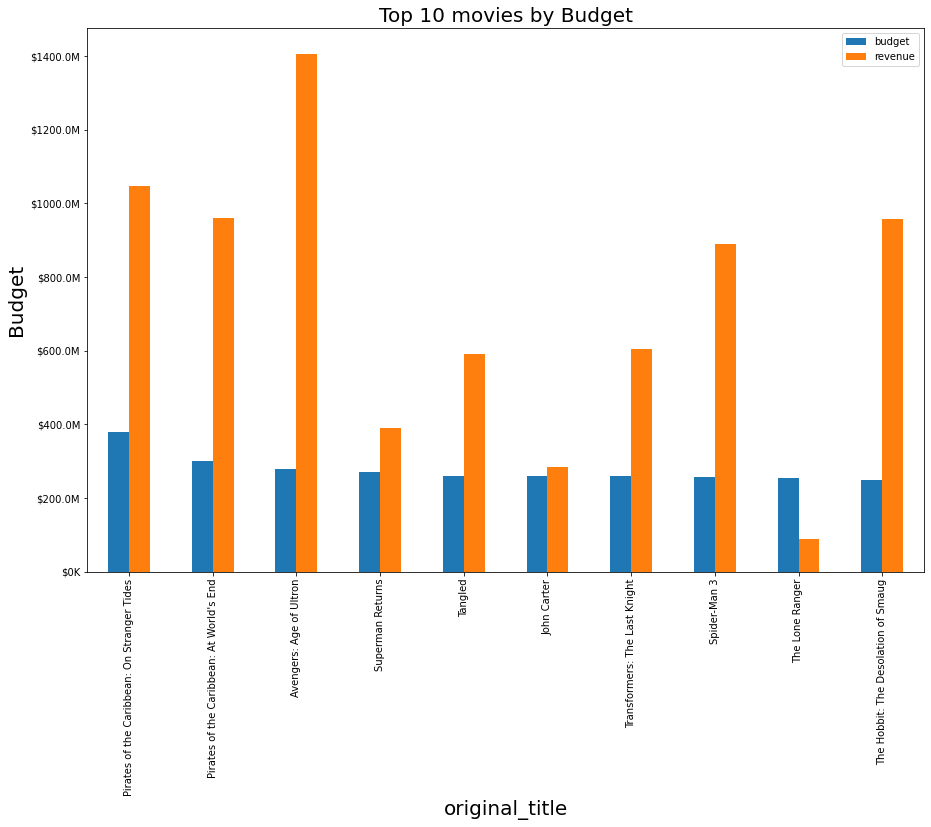

In [0]:
df_moviesBybudget=df.select('id_ori','original_title','budget','revenue').orderBy(col('budget'),ascending=False)

#convert to Pandas dataframe
df_pd_top15moviesBybudget=df_moviesBybudget.toPandas().head(10)


def currency(x, pos):
    'The two args are the value and tick position'
    if x >= 1000000:
        return '${:1.1f}M'.format(x*1e-6)
    return '${:1.0f}K'.format(x*1e-3)



ax=df_pd_top15moviesBybudget.plot(x="original_title", y=["budget","revenue"],kind="bar",figsize=(15, 10))
formatter = FuncFormatter(currency)
ax.yaxis.set_major_formatter(formatter)
ax.set_xlabel('original_title',fontsize=20)
ax.set_ylabel('Budget',fontsize=20)
ax.set_title('Top 10 movies by Budget',fontsize=20, loc='center')
plt.show()

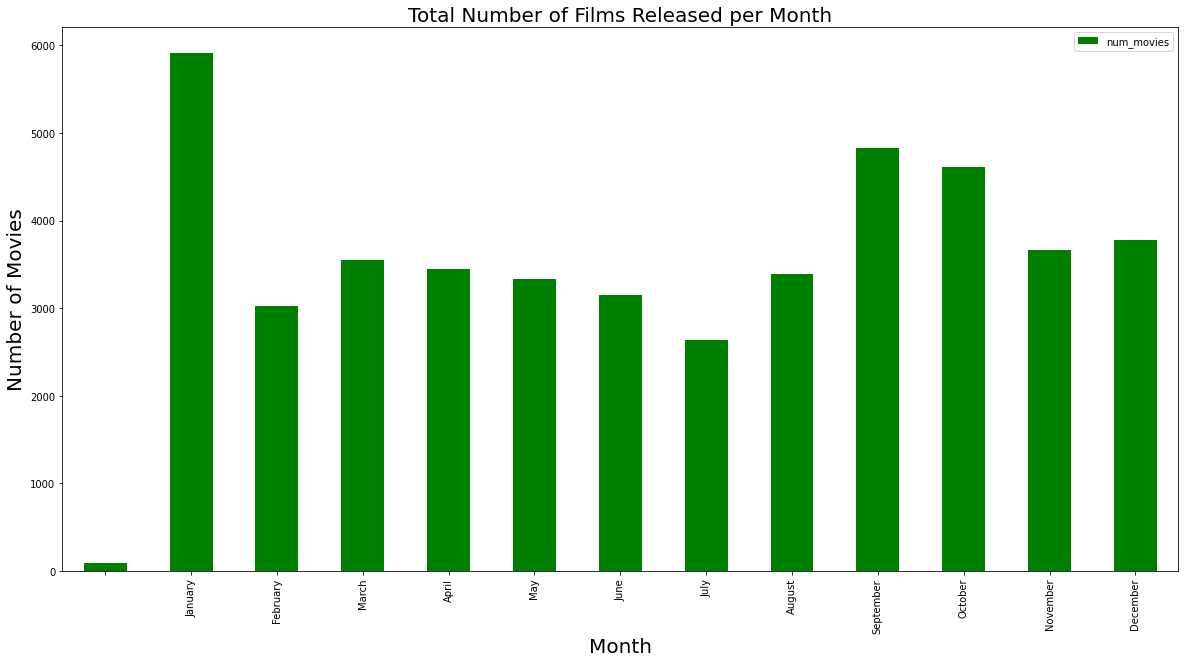

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from pyspark.sql.functions import to_date, year, month, count
from pyspark.sql.types import *

#Calculate the total number of films released per month
df_by_month = df.withColumn('release_date', to_date(col('release_date')))\
.groupBy(month('release_date').alias('month'))\
.agg(count('*').alias('num_movies'))\
.sort('month')\


month_name_map = {
1: 'January',
2: 'February',
3: 'March',
4: 'April',
5: 'May',
6: 'June',
7: 'July',
8: 'August',
9: 'September',
10: 'October',
11: 'November',
12: 'December'
}


df_pd_by_month['month_name'] = df_pd_by_month['month'].apply(lambda x: month_name_map.get(x, '') if x is not None else None)
ax = df_pd_by_month.plot(kind='bar', x='month_name', y='num_movies', figsize=(20, 10), color='green')
ax.set_title('Total Number of Films Released per Month', fontsize=20, loc='center')
ax.set_xlabel('Month', fontsize=20)
ax.set_ylabel('Number of Movies', fontsize=20)
plt.show()

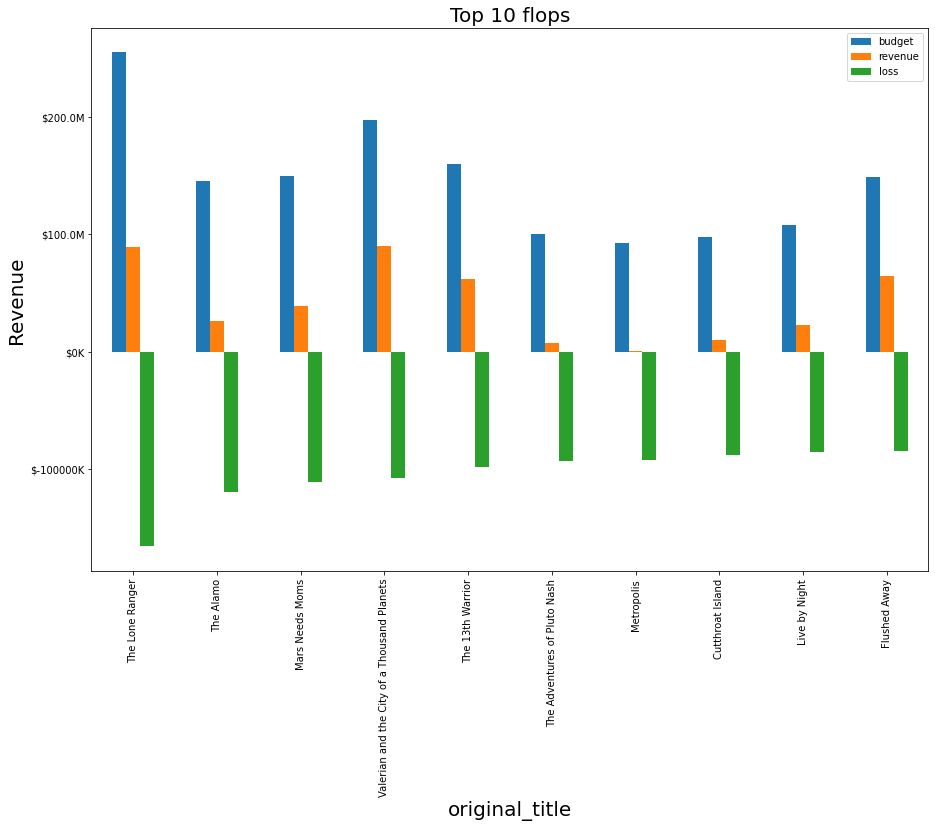

In [0]:
df_moviesByLoss=df.filter(col('revenue')>0)\
                  .withColumn("loss",coalesce(col('revenue'),lit(0))-coalesce(col('budget'),lit(0)))\
                  .filter(col('loss')<0)\
                  .select('id_ori','original_title','revenue','budget',"loss").orderBy(col('loss'),ascending=True)

df_pd_moviesByLoss=df_moviesByLoss.toPandas().head(10)

ax=df_pd_moviesByLoss.plot(x="original_title", y=["budget","revenue",'loss'],kind="bar",figsize=(15, 10))
formatter = FuncFormatter(currency)
ax.yaxis.set_major_formatter(formatter)

ax.set_title('Top 10 flops',fontsize=20, loc='center')
ax.set_xlabel('original_title',fontsize=20)
ax.set_ylabel('Revenue',fontsize=20)
plt.legend()
plt.show()

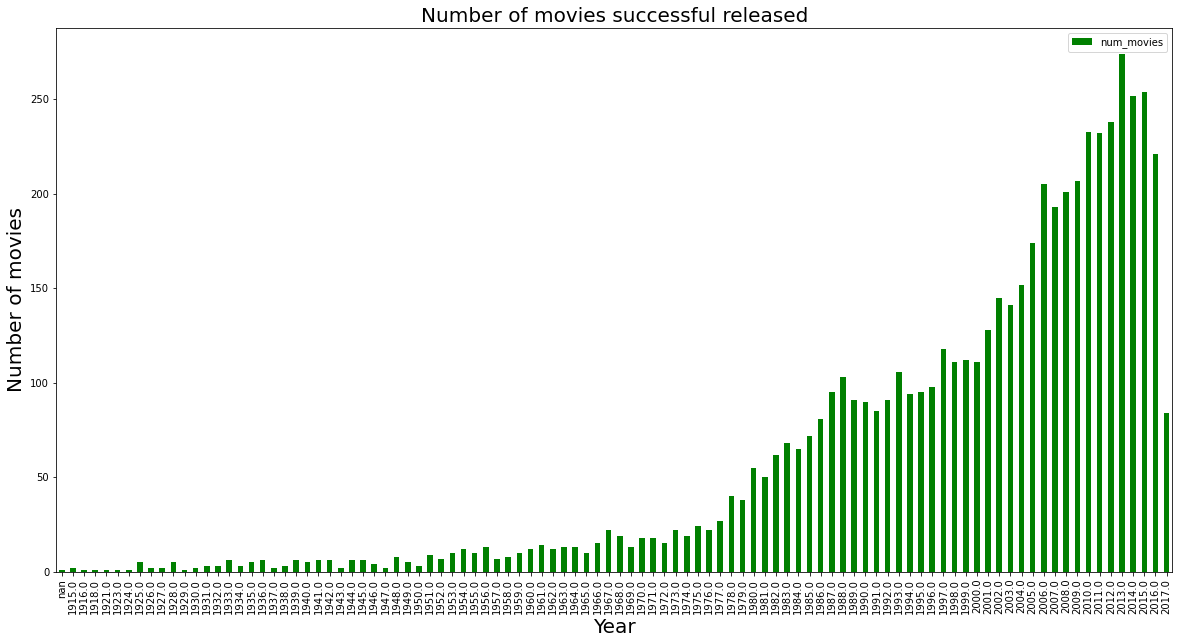

In [0]:
# Calculate the number of films released per year that have won money
df_gain = df.filter(col('revenue') > 0) \
            .withColumn("gain", coalesce(col('revenue'), lit(0)) - coalesce(col('budget'), lit(0))) \
            .filter(col('gain') > 0)

df_gain_by_year = df_gain.withColumn('release_date', to_date(col('release_date'))) \
                        .groupBy(year('release_date').alias('year')) \
                        .agg(count('*').alias('num_movies')) \
                        .sort('year')

# Display the number of unsuccessful films (gains) per year in a bar chart
df_pd_gain_by_year = df_gain_by_year.toPandas()

ax = df_pd_gain_by_year.plot(kind='bar', x='year', y='num_movies', figsize=(20, 10), color='green')
ax.set_title('Number of movies successful released', fontsize=20, loc='center')
ax.set_xlabel('Year', fontsize=20)
ax.set_ylabel('Number of movies', fontsize=20)
fig.update_xaxes(
    range=[1900,2018],  # sets the range of xaxis
    constrain="domain",  # meanwhile compresses the xaxis by decreasing its "domain"
)
plt.show()


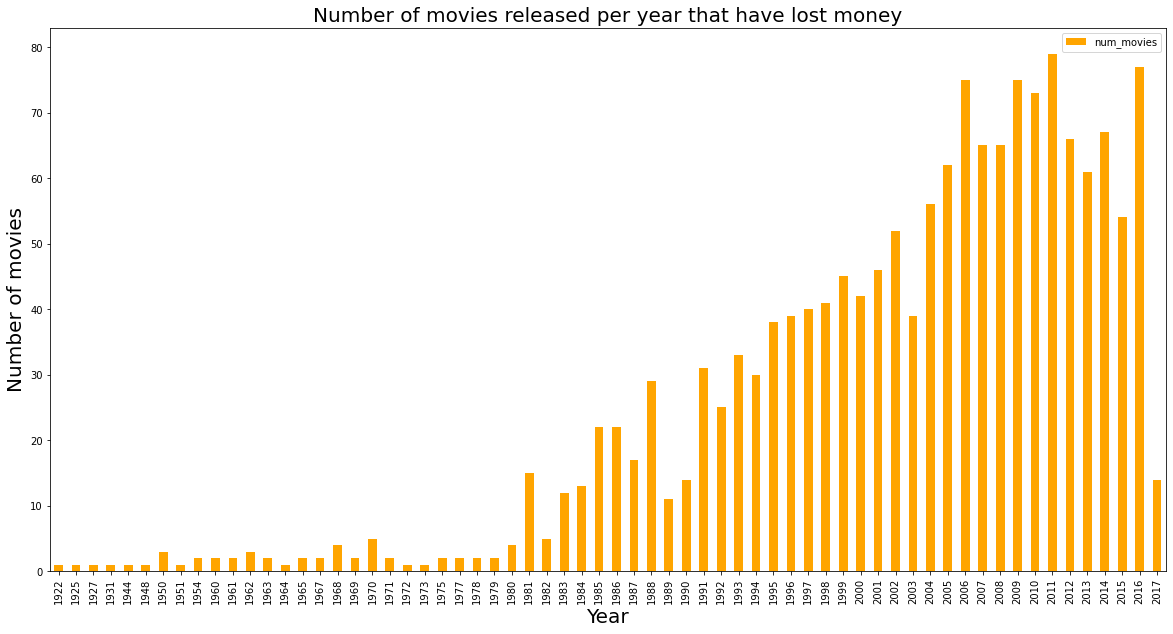

In [0]:
# Calculate the number of films released per year that have lost money
df_loss = df.filter(col('revenue') > 0) \
            .withColumn("loss", coalesce(col('revenue'), lit(0)) - coalesce(col('budget'), lit(0))) \
            .filter(col('loss') < 0)

df_loss_by_year = df_loss.withColumn('release_date', to_date(col('release_date'))) \
                        .groupBy(year('release_date').alias('year')) \
                        .agg(count('*').alias('num_movies')) \
                        .sort('year')

# Display the number of unsuccessful films (losses) per year in a bar chart
df_pd_loss_by_year = df_loss_by_year.toPandas()

ax = df_pd_loss_by_year.plot(kind='bar', x='year', y='num_movies', figsize=(20, 10), color='orange')
ax.set_title('Number of movies released per year that have lost money', fontsize=20, loc='center')
ax.set_xlabel('Year', fontsize=20)
ax.set_ylabel('Number of movies', fontsize=20)
fig.update_xaxes(
    range=[1900,2018],  # sets the range of xaxis
    constrain="domain",  # meanwhile compresses the xaxis by decreasing its "domain"
)
plt.show()


In [0]:

# Calculate the number of successful movies released per year
df_success = df.filter(col('revenue') > 0) \
               .withColumn("profit", coalesce(col('revenue'), lit(0)) - coalesce(col('budget'), lit(0))) \
               .filter(col('profit') > 0) \
               .withColumn('release_date', to_date(col('release_date'))) \
               .groupBy(year('release_date').alias('year')) \
               .agg(count('*').alias('num_movies'))

# Calculate the number of unsuccessful movies released per year
df_loss = df.filter(col('revenue') > 0) \
            .withColumn("loss", coalesce(col('revenue'), lit(0)) - coalesce(col('budget'), lit(0))) \
            .filter(col('loss') < 0) \
            .withColumn('release_date', to_date(col('release_date'))) \
            .groupBy(year('release_date').alias('year')) \
            .agg(count('*').alias('num_movies'))

# Convert to pandas dataframe and merge the two dataframes
df_pd_moviesperYear_success = df_success.toPandas().fillna(0).astype({'year':int}).sort_values(by='year', ascending=True, ignore_index=True)
df_pd_moviesperYear_loss = df_loss.toPandas().fillna(0).astype({'year':int}).sort_values(by='year', ascending=True, ignore_index=True)
df_pd_moviesperYear = df_pd_moviesperYear_success.merge(df_pd_moviesperYear_loss, on='year', how='outer')
df_pd_moviesperYear = df_pd_moviesperYear.fillna(0)

# Create a line chart with two lines (one for successful movies, one for unsuccessful movies)
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_pd_moviesperYear['year'], y=df_pd_moviesperYear['num_movies_x'], mode='lines', name='Successful', line=dict(color='green')))
fig.add_trace(go.Scatter(x=df_pd_moviesperYear['year'], y=df_pd_moviesperYear['num_movies_y'], mode='lines', name='Unsuccessful', line=dict(color='red')))

# Set chart title and axis labels
fig.update_layout(title='Number of movies released per year', xaxis_title='Year', yaxis_title='Number of movies')
fig.update_xaxes(
    range=[1980,2018],  # sets the range of xaxis
    constrain="domain",  # meanwhile compresses the xaxis by decreasing its "domain"
)
# Show the chart
fig.show()


### Successful / Unsuccessful films per Genre

In [0]:
stat_genre = df.filter(col('revenue') > 0) \
    .groupBy('genres_value') \
    .agg({"revenue": "sum", "budget": "sum"}) \
    .withColumnRenamed("sum(revenue)", "total_revenue") \
    .withColumnRenamed("sum(budget)", "total_budget") \
    .withColumn("profit", col("total_revenue") - col("total_budget"))


In [0]:
# Calculate the number of successful movies per genre
df_success = df.filter(col('revenue') > 0) \
               .withColumn("profit", coalesce(col('revenue'), lit(0)) - coalesce(col('budget'), lit(0))) \
               .filter(col('profit') > 0) \
               .groupBy('genres_value') \
               .agg(count('*').alias('num_successful_movies'))

# Calculate the number of unsuccessful movies per genre
df_loss = df.filter(col('revenue') > 0) \
            .withColumn("loss", coalesce(col('revenue'), lit(0)) - coalesce(col('budget'), lit(0))) \
            .filter(col('loss') < 0) \
            .groupBy('genres_value') \
            .agg(count('*').alias('num_unsuccessful_movies'))

In [0]:
stat_genre= stat_genre.join(
    df_success.groupBy('genres_value').agg(count('*').alias('num_successful_movies')),
    on='genres_value',
    how='left'
)

In [0]:
stat_genre= stat_genre.join(
    df_loss.groupBy('genres_value').agg(count('*').alias('num_unsuccessful_movies')),
    on='genres_value',
    how='left'
)

In [0]:
stat_genre.show()

+--------------------+-------------+------------+----------+---------------------+-----------------------+
|        genres_value|total_revenue|total_budget|    profit|num_successful_movies|num_unsuccessful_movies|
+--------------------+-------------+------------+----------+---------------------+-----------------------+
|Action,Adventure,...|   7324404804|  2025000000|5299404804|                    1|                   null|
|      Thriller,Crime|   1287142861|   333541873| 953600988|                    1|                      1|
|Action,Adventure,...|     93305856|   100000000|  -6694144|                    1|                      1|
|Drama,Comedy,Romance|   1667865767|   514794111|1153071656|                    1|                      1|
|Action,Thriller,S...|      2856712|    15000000| -12143288|                 null|                      1|
|Adventure,Family,...|   3321095082|  1442914731|1878180351|                    1|                      1|
|Action,Thriller,S...|    861241560| 

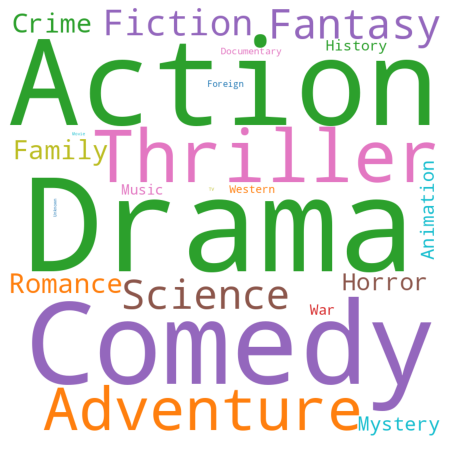

In [0]:
# Filter the stat_genre dataframe to only include rows with non-null values in the num_successful_movies column
successful_genres = stat_genre.filter(col('num_successful_movies').isNotNull())

# Convert the genres_value column to a list
genre_list = successful_genres.select('genres_value').rdd.flatMap(lambda x: x).collect()

# Create a string from the list of genres
genre_string = ' '.join(genre_list)

# Generate a wordcloud using the genre string and display it
wordcloud = WordCloud(width=800, height=800, background_color='white', colormap='tab10', collocations=False).generate(genre_string)

plt.figure(figsize=(8, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

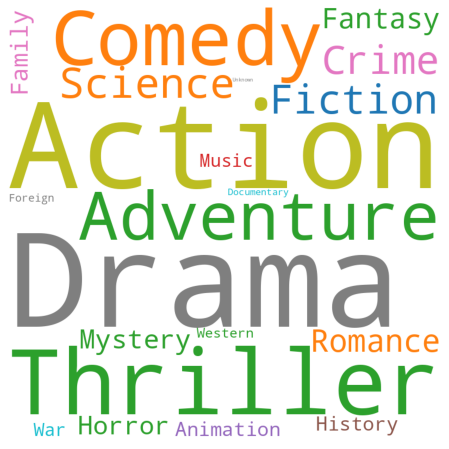

In [0]:
# Filter the stat_genre dataframe to only include rows with non-null values in the num_successful_movies column
successful_genres = stat_genre.filter(col('num_unsuccessful_movies').isNotNull())

# Convert the genres_value column to a list
genre_list = successful_genres.select('genres_value').rdd.flatMap(lambda x: x).collect()

# Create a string from the list of genres
genre_string = ' '.join(genre_list)

# Generate a wordcloud using the genre string and display it
wordcloud = WordCloud(width=800, height=800, background_color='white', colormap='tab10', collocations=False).generate(genre_string)

plt.figure(figsize=(8, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Successful / Unsuccessful films per Country

In [0]:
prod_cntry_schema = ArrayType(
    StructType([
        StructField('iso_3166_1', StringType(), nullable=False),
        StructField('name', StringType(), nullable=False)
    ])
)

In [0]:

# Extract the production countries and their respective codes from the dataset
# Extract the production countries and their respective codes from the dataset
df_prodcntry = df.where(col('production_countries') != "") \
    .select('id_ori', 'original_title', 'production_countries') \
    .select(
        '*',
        explode(from_json(col('production_countries'), prod_cntry_schema)).alias('parsedval')
    ) \
    .select(
        '*',
        col('parsedval').getItem('iso_3166_1').alias('cntry_code'),
        col('parsedval').getItem('name').alias('cntry_name')
    )


In [0]:
df_prodcntry.show()

+------+--------------------+--------------------+--------------------+----------+--------------------+
|id_ori|      original_title|production_countries|           parsedval|cntry_code|          cntry_name|
+------+--------------------+--------------------+--------------------+----------+--------------------+
|118013|           Endeavour|[{'iso_3166_1': '...|  {Unknown, Unknown}|   Unknown|             Unknown|
|293412|        Running Wild|[{'iso_3166_1': '...|  {Unknown, Unknown}|   Unknown|             Unknown|
| 82120|  Arroseur et arrosé|[{'iso_3166_1': '...|        {FR, France}|        FR|              France|
|104704|Le Diable au couvent|[{'iso_3166_1': '...|        {FR, France}|        FR|              France|
| 49295|L'Illusionniste f...|[{'iso_3166_1': '...|        {FR, France}|        FR|              France|
|143634|  El hotel eléctrico|[{'iso_3166_1': '...|        {FR, France}|        FR|              France|
|143634|  El hotel eléctrico|[{'iso_3166_1': '...|         {ES, 

In [0]:
stat_production_countries = df.filter(col('revenue') > 0) \
    .groupBy('production_countries') \
    .agg({"revenue": "sum", "budget": "sum"}) \
    .withColumnRenamed("sum(revenue)", "total_revenue") \
    .withColumnRenamed("sum(budget)", "total_budget") \
    .withColumn("profit", col("total_revenue") - col("total_budget"))


In [0]:
joined_df = stat_production_countries.join(df_prodcntry, 'production_countries')

In [0]:
joined_df.show()

+--------------------+-------------+------------+------------+------+--------------------+--------------------+----------+--------------------+
|production_countries|total_revenue|total_budget|      profit|id_ori|      original_title|           parsedval|cntry_code|          cntry_name|
+--------------------+-------------+------------+------------+------+--------------------+--------------------+----------+--------------------+
|[{'iso_3166_1': '...|    492171856|   450236852|    41935004|118013|           Endeavour|  {Unknown, Unknown}|   Unknown|             Unknown|
|[{'iso_3166_1': '...|    492171856|   450236852|    41935004|293412|        Running Wild|  {Unknown, Unknown}|   Unknown|             Unknown|
|[{'iso_3166_1': '...|   2803104426|  1177872872|  1625231554| 82120|  Arroseur et arrosé|        {FR, France}|        FR|              France|
|[{'iso_3166_1': '...|   2803104426|  1177872872|  1625231554|104704|Le Diable au couvent|        {FR, France}|        FR|              

In [0]:
# Calculate the number of successful movies per genre
df_success = df.filter(col('revenue') > 0) \
               .withColumn("profit", coalesce(col('revenue'), lit(0)) - coalesce(col('budget'), lit(0))) \
               .filter(col('profit') > 0) \
               .groupBy('production_countries') \
               .agg(count('*').alias('num_successful_movies'))

# Calculate the number of unsuccessful movies per genre
df_loss = df.filter(col('revenue') > 0) \
            .withColumn("loss", coalesce(col('revenue'), lit(0)) - coalesce(col('budget'), lit(0))) \
            .filter(col('loss') < 0) \
            .groupBy('production_countries') \
            .agg(count('*').alias('num_unsuccessful_movies'))


In [0]:
joined_df= joined_df.join(
    df_success.groupBy('production_countries').agg(count('*').alias('num_successful_movies')),
    on='production_countries',
    how='left'
)

In [0]:
joined_df= joined_df.join(
    df_loss.groupBy('production_countries').agg(count('*').alias('num_unsuccessful_movies')),
    on='production_countries',
    how='left'
)

In [0]:
joined_df.show()

+--------------------+-------------+------------+------------+------+--------------------+--------------------+----------+--------------------+---------------------+-----------------------+
|production_countries|total_revenue|total_budget|      profit|id_ori|      original_title|           parsedval|cntry_code|          cntry_name|num_successful_movies|num_unsuccessful_movies|
+--------------------+-------------+------------+------------+------+--------------------+--------------------+----------+--------------------+---------------------+-----------------------+
|[{'iso_3166_1': '...|    492171856|   450236852|    41935004|118013|           Endeavour|  {Unknown, Unknown}|   Unknown|             Unknown|                    1|                      1|
|[{'iso_3166_1': '...|    492171856|   450236852|    41935004|293412|        Running Wild|  {Unknown, Unknown}|   Unknown|             Unknown|                    1|                      1|
|[{'iso_3166_1': '...|   2803104426|  1177872872| 

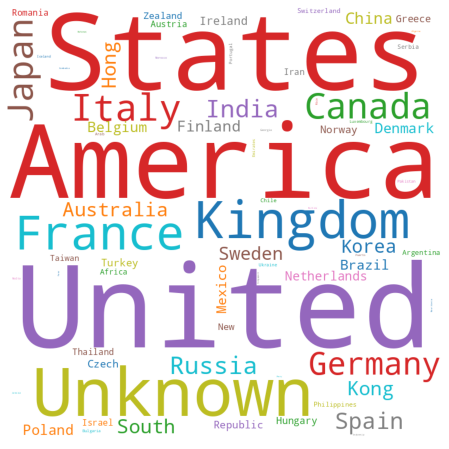

In [0]:
# Filter the stat_production_countries dataframe to only include rows with non-null values in the num_successful_movies column
successful_countries = joined_df.filter(col('num_successful_movies').isNotNull())

# Convert the countries column to a list
country_list = successful_countries.select('cntry_name').rdd.flatMap(lambda x: x).collect()

# Create a string from the list of countries
country_string = ' '.join(country_list)

# Generate a wordcloud using the genre string and display it
wordcloud = WordCloud(width=800, height=800, background_color='white', colormap='tab10', collocations=False).generate(country_string)

plt.figure(figsize=(8, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

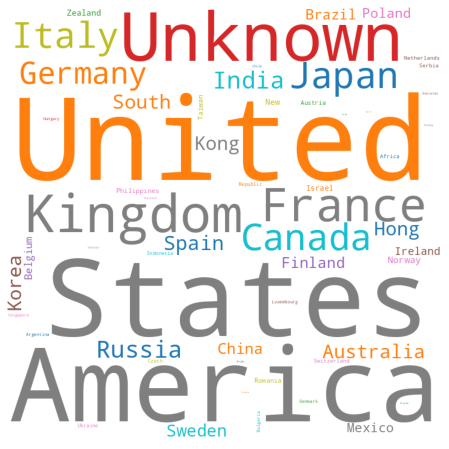

In [0]:
# Filter the stat_production_countries dataframe to only include rows with non-null values in the num_successful_movies column
successful_countries = joined_df.filter(col('num_unsuccessful_movies').isNotNull())

# Convert the countries column to a list
country_list = successful_countries.select('cntry_name').rdd.flatMap(lambda x: x).collect()

# Create a string from the list of countries
country_string = ' '.join(country_list)

# Generate a wordcloud using the genre string and display it
wordcloud = WordCloud(width=800, height=800, background_color='white', colormap='tab10', collocations=False).generate(country_string)

plt.figure(figsize=(8, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [0]:
num_films_per_country = joined_df.groupBy("cntry_name").agg(count("id_ori").alias("num_films"))

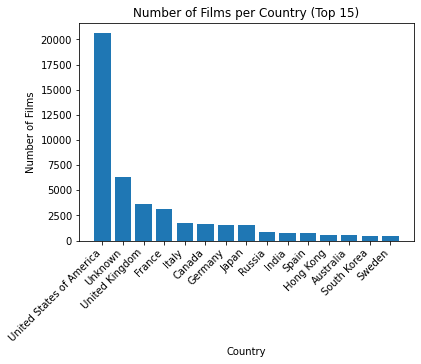

In [0]:
# Top 15 countries by number of films
num_films_per_country = joined_df.groupBy("cntry_name").agg(count("id_ori").alias("num_films")) \
    .orderBy("num_films", ascending=False) \
    .limit(15)

# Extract the data
x = num_films_per_country.select("cntry_name").rdd.flatMap(lambda x: x).collect()
y = num_films_per_country.select("num_films").rdd.flatMap(lambda x: x).collect()

# Create the bar chart
plt.bar(x, y)

# Add title and labels
plt.title("Number of Films per Country (Top 15)")
plt.xlabel("Country")
plt.ylabel("Number of Films")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Show the chart
plt.show()


# Credits Table

In [0]:
cast_schema=ArrayType(StructType([
  StructField('cast_id',IntegerType(),nullable=True),
  StructField('character',StringType(),nullable=True),
  StructField('credit_id',StringType(),nullable=True),
  StructField('gender',IntegerType(),nullable=True),
  StructField('id',IntegerType(),nullable=True),
  StructField('name',StringType(),nullable=True),
  StructField('order',IntegerType(),nullable=True),
  StructField('profile_path',StringType(),nullable=True)
]))

def update_cast(value):
    value = value.replace("'profile_path': None", "'profile_path': null")
    return value

convertUDF = udf(lambda z: update_cast(z)) 

credits = credits.withColumn("cast", convertUDF(col("cast")))
credits=credits.withColumn('movies_cast',from_json(col('cast'),cast_schema).getField("name").alias('movies_cast'))\
                .withColumn('director',regexp_extract(col('crew'),"(.)('job': 'Director', 'name': ')((\w+)(\s+)(\w+))(')",3))

credits.show()

+--------------------+--------------------+-----+--------------------+----------------+
|                cast|                crew|   id|         movies_cast|        director|
+--------------------+--------------------+-----+--------------------+----------------+
|[{'cast_id': 1, '...|[{'credit_id': '5...|11517|[Wesley Snipes, W...|    Joseph Ruben|
|[{'cast_id': 1, '...|[{'credit_id': '5...| 1408|[Geena Davis, Mat...|    Renny Harlin|
|[{'cast_id': 1, '...|[{'credit_id': '5...| 8012|[John Travolta, G...|Barry Sonnenfeld|
|[{'cast_id': 1, '...|[{'credit_id': '5...|10858|[Anthony Hopkins,...|    Oliver Stone|
|[{'cast_id': 1, '...|[{'credit_id': '5...|31357|[Whitney Houston,...| Forest Whitaker|
|[{'cast_id': 2, '...|[{'credit_id': '5...|15602|[Walter Matthau, ...|   Howard Deutch|
|[{'cast_id': 1, '...|[{'credit_id': '5...| 9273|[Jim Carrey, Ian ...|  Steve Oedekerk|
|[{'cast_id': 42, ...|[{'credit_id': '5...|    5|[Tim Roth, Antoni...|  Allison Anders|
|[{'cast_id': 1, '...|[{'credit_

In [0]:
credits_director=credits.where(col('director')!='').select('id','director')

df2_gener=df.where(col('genres_value')!='').select(col('id_ori'),'genres_value')

df_director=df2_gener.join(credits_director,credits_director.id==df2_gener.id_ori,how='inner').select('id','genres_value','director')

rdd2=df_director.select(col('genres_value')).rdd.flatMap(lambda x:x.genres_value.split(",")).distinct().collect()

exprs=[when(col('genres_value').contains(element),'1').otherwise('0').alias(element) for element in rdd2 ]

df_director=df_director.select(*df_director.columns, *exprs)
df_director.toPandas()

id 
 genres_value 
 director 
 Drama 
 Fantasy 
 Family 
 Foreign 
 Action 
 Unknown 
 Documentary 
 ... 
 Science Fiction 
 TV Movie 
 Comedy 
 Adventure 
 War 
 Music 
 Horror 
 Crime 
 History 
 Mystery 
 
 
 
 
 0 
 22279 
 Romance,Drama,Comedy 
 Mike Newell 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 ... 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 1 
 39953 
 Drama 
 Brian Sloan 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 ... 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 2 
 762 
 Adventure,Comedy,Fantasy 
 Terry Gilliam 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 ... 
 0 
 0 
 1 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 3 
 884 
 Drama,Thriller,Romance 
 David Cronenberg 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 ... 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 4 
 18316 
 Action,Adventure,Thriller 
 Kevin Hooks 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 ... 
 0 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 35980 
 44105 
 Drama 
 Zeki Demirkubuz 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 ... 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 35981 
 165023 
 Unknown 
 Yasuharu Hasebe 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 ... 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 35982 
 5040 
 History 
 Jerzy Kawalerowicz 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 ... 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 35983 
 433054 
 Documentary 
 Greg Barker 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 ... 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 35984 
 390747 
 Documentary 
 Vanessa Gould 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 ... 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 
 35985 rows × 24 columns

In [0]:
expr={elements: "sum" for elements in df_director.columns[3:]}
tab_a=df_director.select(*[colc for colc in df_director.columns[2:]]).groupBy(col('director')).agg(expr)
tab_b=df_director.select(col('director')).groupBy(col('director')).agg(count('director').alias('filmcounts'))

data = tab_b.join(tab_a,['director']).orderBy(col('filmcounts').desc()).toPandas()
data

director 
 filmcounts 
 sum(Animation) 
 sum(Thriller) 
 sum(War) 
 sum(Horror) 
 sum(Documentary) 
 sum(Comedy) 
 sum(Western) 
 sum(Fantasy) 
 ... 
 sum(Drama) 
 sum(Foreign) 
 sum(History) 
 sum(Music) 
 sum(Mystery) 
 sum(TV Movie) 
 sum(Adventure) 
 sum(Unknown) 
 sum(Crime) 
 sum(Action) 
 
 
 
 
 0 
 John Ford 
 66 
 0.0 
 1.0 
 10.0 
 0.0 
 2.0 
 16.0 
 21.0 
 0.0 
 ... 
 38.0 
 0.0 
 6.0 
 0.0 
 1.0 
 0.0 
 9.0 
 1.0 
 4.0 
 9.0 
 
 
 1 
 Michael Curtiz 
 65 
 0.0 
 6.0 
 5.0 
 4.0 
 0.0 
 13.0 
 5.0 
 0.0 
 ... 
 43.0 
 0.0 
 3.0 
 12.0 
 4.0 
 0.0 
 7.0 
 0.0 
 14.0 
 11.0 
 
 
 2 
 Werner Herzog 
 54 
 0.0 
 2.0 
 3.0 
 1.0 
 34.0 
 3.0 
 0.0 
 0.0 
 ... 
 19.0 
 4.0 
 3.0 
 0.0 
 0.0 
 1.0 
 5.0 
 0.0 
 3.0 
 1.0 
 
 
 3 
 Alfred Hitchcock 
 53 
 0.0 
 34.0 
 4.0 
 2.0 
 0.0 
 6.0 
 0.0 
 0.0 
 ... 
 30.0 
 0.0 
 0.0 
 1.0 
 22.0 
 0.0 
 2.0 
 1.0 
 17.0 
 2.0 
 
 
 4 
 Woody Allen 
 49 
 0.0 
 5.0 
 0.0 
 0.0 
 0.0 
 42.0 
 0.0 
 2.0 
 ... 
 25.0 
 0.0 
 1.0 
 1.0 
 4.0 
 0.0 
 0.0 
 0.0 
 5.0 
 3.0 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 14038 
 Linda Wendel 
 1 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 ... 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 
 
 14039 
 Walter Matthau 
 1 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 ... 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 1.0 
 
 
 14040 
 Katrin Laur 
 1 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 1.0 
 ... 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 
 
 14041 
 Ramesh Sippy 
 1 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 ... 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 
 
 14042 
 Henry Crum 
 1 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 ... 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 1.0 
 
 
 
 14043 rows × 23 columns

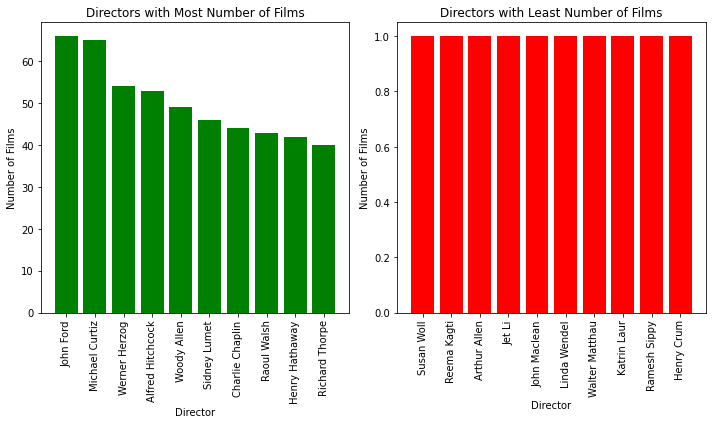

In [0]:
# Split the data into two parts
top_directors = data[:10]
bottom_directors = data[-10:]

# Create the two bar charts
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 6))

# Top directors chart
ax1.bar(top_directors['director'], top_directors['filmcounts'], color='Green')
ax1.set_title('Directors with Most Number of Films')
ax1.set_xlabel('Director')
ax1.set_ylabel('Number of Films')
ax1.tick_params(axis='x', rotation=90)

# Bottom directors chart
ax2.bar(bottom_directors['director'], bottom_directors['filmcounts'], color='red')
ax2.set_title('Directors with Least Number of Films')
ax2.set_xlabel('Director')
ax2.set_ylabel('Number of Films')
ax2.tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

In [0]:
movies = df.where(col('original_title') != '').select(col('id_ori'), 'original_title')

# Join data and explode cast
actor = credits.withColumn('movies_cast', explode(from_json(col('cast'), cast_schema))) \
    .join(movies, movies.id_ori == credits.id, how='inner') \
    .select(col('id'), 'original_title', col('movies_cast.*'), col('director'))


In [0]:
actor.show()

+-----+--------------------+-------+-----------------+--------------------+------+-------+-------------------+-----+--------------------+-----------+
|   id|      original_title|cast_id|        character|           credit_id|gender|     id|               name|order|        profile_path|   director|
+-----+--------------------+-------+-----------------+--------------------+------+-------+-------------------+-----+--------------------+-----------+
|22279|An Awfully Big Ad...|      1|      P.L. O'Hara|52fe443bc3a368484...|     2|   4566|       Alan Rickman|    0|/7tADZs4ILE93oJ5p...|Mike Newell|
|22279|An Awfully Big Ad...|      2|  Meredith Potter|52fe443bc3a368484...|     2|   3291|         Hugh Grant|    1|/r3rSJLJwKmsJyPA3...|Mike Newell|
|22279|An Awfully Big Ad...|      4|           Stella|52fe443bc3a368484...|     1|  95789|     Georgina Cates|    2|/kgAOadgrgupouhfC...|Mike Newell|
|22279|An Awfully Big Ad...|      5|             Lily|52fe443bc3a368484...|     1|  47754|    Rita T

In [0]:
# Count the number of movies for each actor
actor_counts = actor.groupBy('name').count().orderBy(col('count').desc()).limit(15)
actor_counts.show()

+-----------------+-----+
|             name|count|
+-----------------+-----+
|     Bess Flowers|  241|
|  Christopher Lee|  148|
|       John Wayne|  125|
|Samuel L. Jackson|  123|
| Gérard Depardieu|  110|
|    Michael Caine|  110|
|   John Carradine|  109|
|Donald Sutherland|  108|
|      Jackie Chan|  108|
|     Frank Welker|  107|
|   Robert De Niro|  104|
|      Danny Trejo|  102|
|    Steve Buscemi|  101|
|     Irving Bacon|   98|
|     John Goodman|   97|
+-----------------+-----+



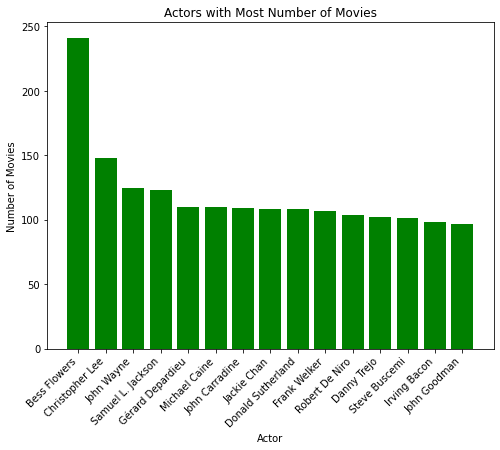

In [0]:
fig, ax = plt.subplots(figsize=(8, 6))

actor_names = [row[0] for row in actor_counts.select('name').collect()]
movie_counts = [row[0] for row in actor_counts.select('count').collect()]

ax.bar(actor_names, movie_counts , color='Green')
ax.set_title('Actors with Most Number of Movies')
ax.set_xlabel('Actor')
ax.set_ylabel('Number of Movies')

plt.xticks(rotation=45, ha='right')
plt.show()

In [0]:
# Count the number of male and female characters
gender_counts = actor.groupBy('gender').count().toPandas()
gender_counts

gender 
 count 
 
 
 
 
 0 
 1 
 111692 
 
 
 1 
 2 
 226490 
 
 
 2 
 0 
 223748

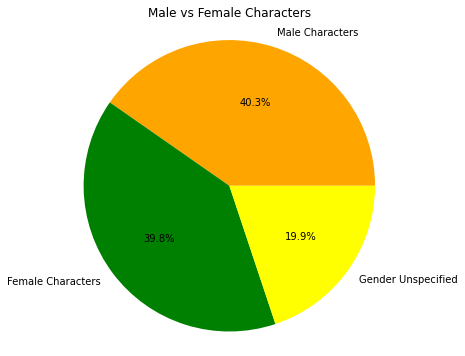

In [0]:

# Convert the Spark DataFrame to a Pandas DataFrame
cast_pd = actor.toPandas()

# Count the number of occurrences of each gender value
gender_counts = cast_pd['gender'].value_counts()
gender_counts[0] = gender_counts.get(0, 0)

# Define the labels and colors for the pie chart
labels = ['Male Characters', 'Female Characters', 'Gender Unspecified']
colors = ['Orange', 'Green', 'Yellow']

plt.pie(gender_counts.values, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Male vs Female Characters')
plt.axis('equal')
plt.show()


# Ratings Table

In [0]:
def format_timestamp(df):
  return df.withColumn("timestamp", from_unixtime("timestamp", "yyyy-MM-dd HH:mm:ss"))

In [0]:
ratings = format_timestamp(ratings)
ratings.show()

+------+-------+------+-------------------+
|userId|movieId|rating|          timestamp|
+------+-------+------+-------------------+
|     1|    110|   1.0|2015-03-09 22:52:09|
|     1|    147|   4.5|2015-03-09 23:07:15|
|     1|    858|   5.0|2015-03-09 22:52:03|
|     1|   1221|   5.0|2015-03-09 22:52:26|
|     1|   1246|   5.0|2015-03-09 22:52:36|
|     1|   1968|   4.0|2015-03-09 23:02:28|
|     1|   2762|   4.5|2015-03-09 22:48:20|
|     1|   2918|   5.0|2015-03-09 22:53:13|
|     1|   2959|   4.0|2015-03-09 22:53:21|
|     1|   4226|   4.0|2015-03-09 23:03:48|
|     1|   4878|   5.0|2015-03-09 22:50:34|
|     1|   5577|   5.0|2015-03-09 22:49:57|
|     1|  33794|   4.0|2015-03-09 23:00:05|
|     1|  54503|   3.5|2015-03-09 22:48:33|
|     1|  58559|   4.0|2015-03-09 23:00:07|
|     1|  59315|   5.0|2015-03-09 22:51:42|
|     1|  68358|   5.0|2015-03-09 22:51:04|
|     1|  69844|   5.0|2015-03-09 23:02:19|
|     1|  73017|   5.0|2015-03-09 23:11:39|
|     1|  81834|   5.0|2015-03-0

In [0]:
ratings_pd = ratings.toPandas()

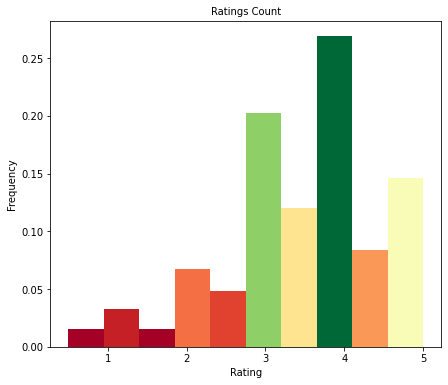

In [0]:
plt.rcParams['figure.figsize'] = (7, 6)
n, bins, patches = plt.hist(ratings_pd['rating'], bins=10, color='green', weights=np.zeros_like(ratings_pd['rating']) + 1. / ratings_pd['rating'].size)

# Set gradient colors for each patch
vmin, vmax = n.min(), n.max()
for patch, value in zip(patches, n):
    color = plt.cm.RdYlGn((value - vmin) / (vmax - vmin))
    patch.set_facecolor(color)

plt.title('Ratings Count', size=10)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


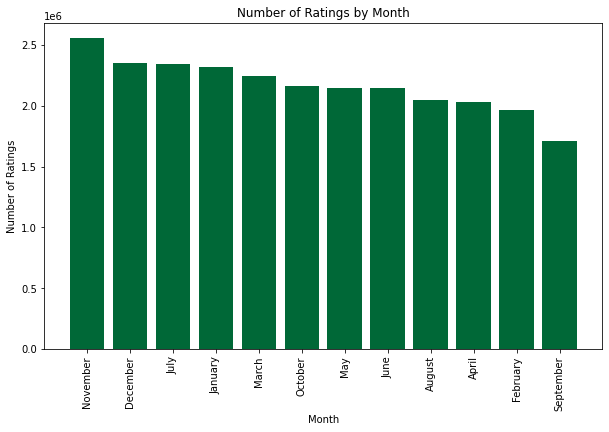

In [0]:
ratings_pd['timestamp'] = pd.to_datetime(ratings_pd['timestamp'])
# Extract month from timestamp
ratings_pd['month'] = ratings_pd['timestamp'].dt.month_name()

# Count number of ratings for each month
month_counts = ratings_pd['month'].value_counts()

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(month_counts.index, month_counts.values, color=plt.cm.RdYlGn((month_counts.values-vmin)/(vmax-vmin)))
plt.title('Number of Ratings by Month')
plt.xlabel('Month')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.show()

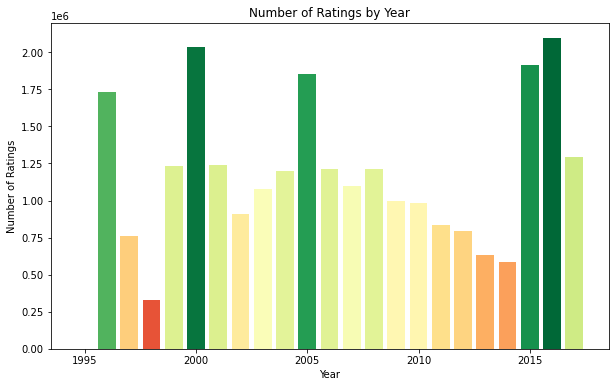

In [0]:
# Extract year from timestamp
ratings_pd['year'] = ratings_pd['timestamp'].dt.year
plt.figure(figsize=(10, 6))

# Count number of ratings for each year
year_counts = ratings_pd['year'].value_counts()

# Plot bar chart with color gradient
plt.bar(year_counts.index, year_counts.values, color=plt.cm.RdYlGn((year_counts.values - year_counts.values.min()) / (year_counts.values.max() - year_counts.values.min())))
plt.title('Number of Ratings by Year')
plt.xlabel('Year')
plt.ylabel('Number of Ratings')
plt.show()


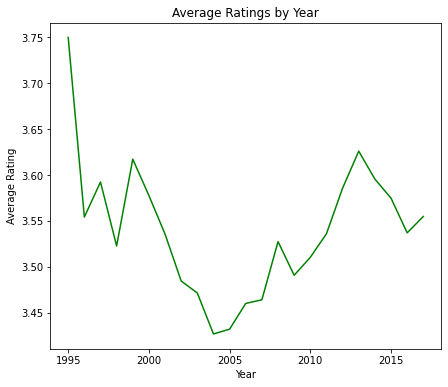

In [0]:
# Group by year and calculate average rating
avg_ratings = ratings_pd.groupby('year')['rating'].mean()

# Plot line chart
avg_ratings.plot(kind='line', color='green')
plt.title('Average Ratings by Year')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.show()

In [0]:
avg_ratings = ratings_pd.groupby('movieId')['rating'].mean()
movie_ratings = pd.DataFrame({'movieId': avg_ratings.index, 'avg_rating': avg_ratings.values})
movie_ratings.head()

movieId 
 avg_rating 
 
 
 
 
 0 
 1 
 3.888158 
 
 
 1 
 2 
 3.236953 
 
 
 2 
 3 
 3.175550 
 
 
 3 
 4 
 2.875713 
 
 
 4 
 5 
 3.079565

In [0]:
percentiles = movie_ratings['avg_rating'].describe(percentiles=[0.25, 0.5, 0.75])
print("Minimum: ", percentiles['min'])
print("25th percentile: ", round(percentiles['25%'], 2))
print("50th percentile: ", round(percentiles['50%'], 2))
print("75th percentile: ", round(percentiles['75%'], 2))
print("Maximum: ", percentiles['max'])

Minimum:  0.5
25th percentile:  2.69
50th percentile:  3.17
75th percentile:  3.5
Maximum:  5.0
